In [ ]:
# import library
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from prettytable import PrettyTable

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Task 1. The Iris dataset includes the following attributes:

In [ ]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

*1.1 Visualizes different species of the Iris dataset based on each combination between features (i.e., sepal length (cm) vs sepal width (cm), sepal length (cm) vs petal length (cm), ...)*

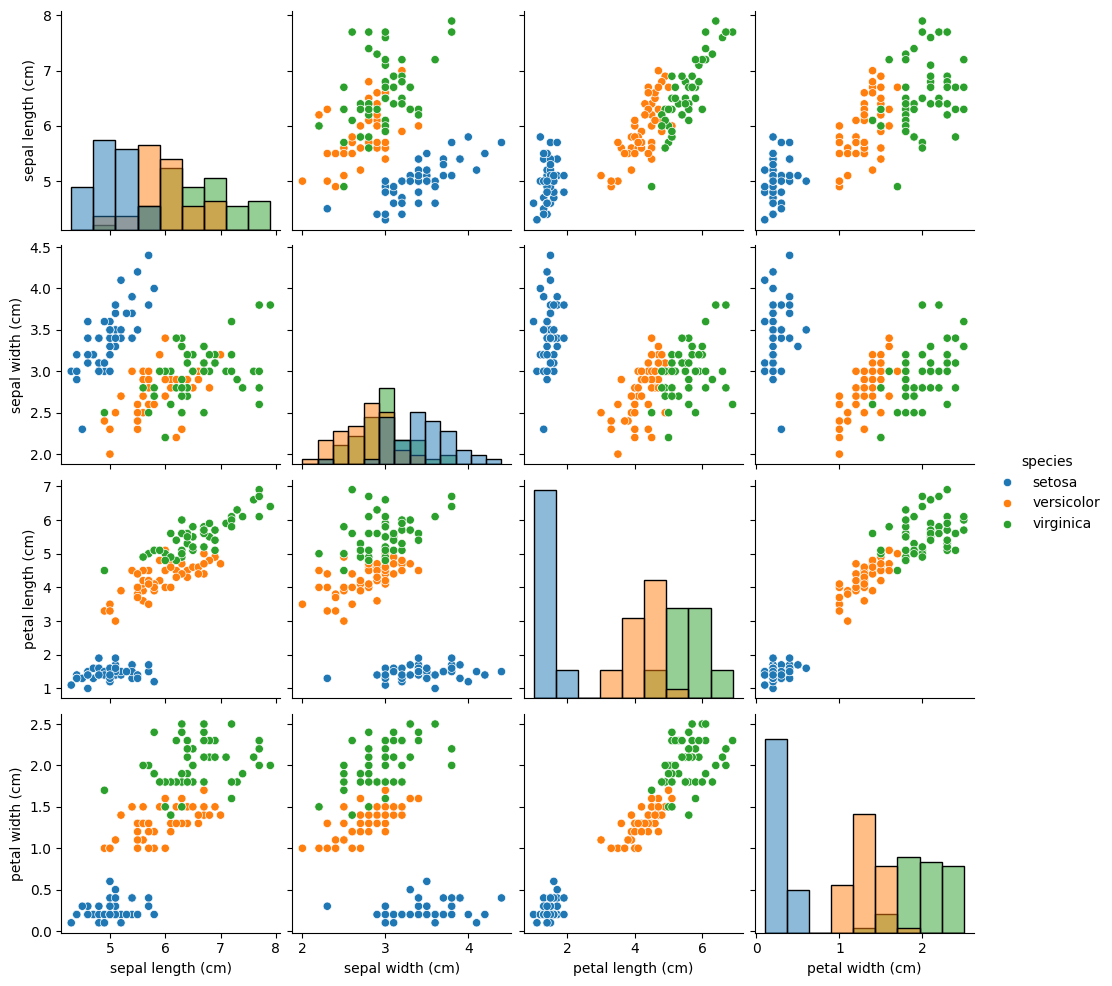

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
# print(iris_df.info())

sns.pairplot(iris_df, hue='species', diag_kind='hist')
plt.show()

*1.2 Visualize the proportion of each Iris species in the dataset using a Pie chart.*

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


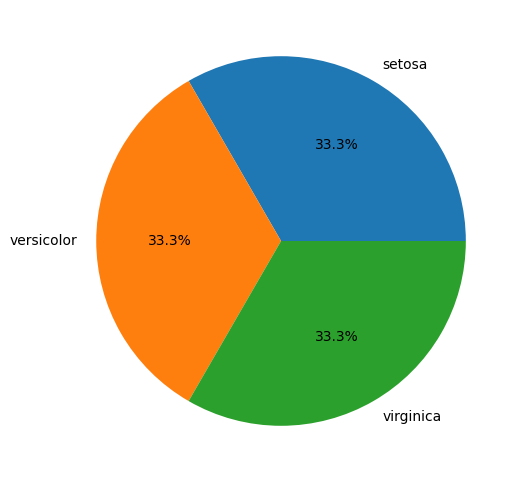

In [ ]:
species_counts = iris_df['species'].value_counts()
print(species_counts)

plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
plt.show()

*1.3. Build a Decision Tree model*

In [ ]:
# X = iris_df.iloc[:, :-1]
# y = iris_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, :-1], iris_df.iloc[:, -1],
                                                    test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_y_pred= dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy: {dt_accuracy}")

Accuracy: 1.0


*1.4. Build a Logistic Regression model*

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy: {lr_accuracy}")

Accuracy: 1.0


*1.5. Build kNN models with k={3, 5, ..., 29}. Then, plot the performance of models with different values of k and select the best value of k.*

In [ ]:
def evalute_accuracy_knn(X_train, y_train, X_test, y_test, k_values):
  accuracy_scores = {}
  for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[k] = accuracy_score(y_test, y_pred)
  return accuracy_scores

Accuracy scores:  dict_values([1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
Best k: 3


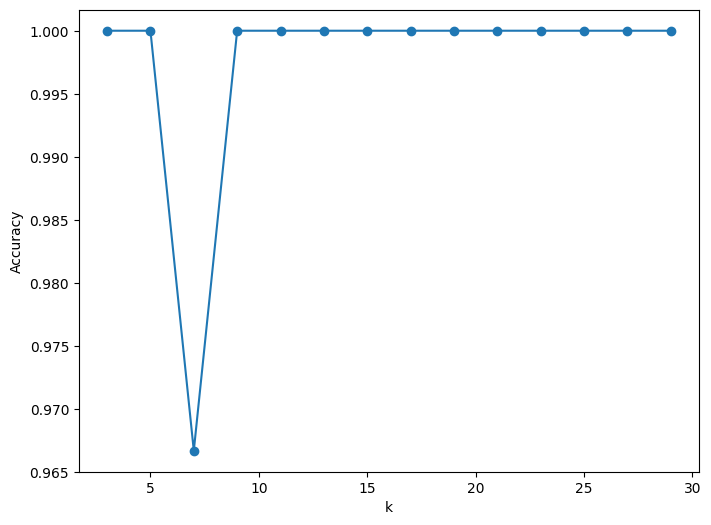

In [ ]:
k_values = list(range(3, 30, 2))
accuracy_scores = {}

accuracy_scores = evalute_accuracy_knn(X_train, y_train, X_test, y_test, k_values)

print('Accuracy scores: ', accuracy_scores.values())
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores.values(), marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')

best_k = max(accuracy_scores, key=accuracy_scores.get)
print(f'Best k: {best_k}')

*1.6. Compare the performance of the above model based on metrics accuracy, precision, recall, f1 measures) using PrettyTable.*

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

def evaluate_model(model_name, y_true, y_pred):
    return [
        model_name,
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, average='macro'),
        recall_score(y_true, y_pred, average='macro'),
        f1_score(y_true, y_pred, average='macro')
    ]

results = [
    evaluate_model('Decision Tree', y_test, dt_y_pred),
    evaluate_model('Logistic Regression', y_test, lr_y_pred),
    evaluate_model('kNN', y_test, knn_y_pred)
]

print(results)
table = PrettyTable()
table.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
for result in results:
    table.add_row(result)

print(table)

[['Decision Tree', 1.0, 1.0, 1.0, 1.0], ['Logistic Regression', 1.0, 1.0, 1.0, 1.0], ['kNN', 1.0, 1.0, 1.0, 1.0]]
+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1 Score |
+---------------------+----------+-----------+--------+----------+
|    Decision Tree    |   1.0    |    1.0    |  1.0   |   1.0    |
| Logistic Regression |   1.0    |    1.0    |  1.0   |   1.0    |
|         kNN         |   1.0    |    1.0    |  1.0   |   1.0    |
+---------------------+----------+-----------+--------+----------+


# Task 2.

The song dataset is used to predict whether a song will reach a spot in the Top 10 of the Billboard Hot 100 Chart. The dataset consists of all songs which made it to the Top 10 of the Billboard Hot 100 Chart from 1990-2010 plus a sample of additional songs that didn't make the Top 10. A detailed description of the features:

In [ ]:
df_songs = pd.read_csv('drive/MyDrive/data/lab4/songs.csv', encoding='latin1')
df_songs.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


*2.1. Split the dataset into a training set "SongsTrain" consisting of all the observations up to and including 2009 song releases, and a testing set "SongsTest", consisting of the 2010 song releases.*

In [ ]:
songs_train = df_songs[df_songs['year'] <= 2009]
songs_test = df_songs[df_songs['year'] == 2010]

print('SongsTrain shape: ', songs_train.shape)
print('SongsTest shape: ', songs_test.shape)

SongsTrain shape:  (7201, 39)
SongsTest shape:  (373, 39)


*2.2. We will only use the variables in our dataset that describe the numerical features of the song in our models. Therefore, we remove the features "year", "songtitle", "artistname", "songID", or "artistID".*

In [ ]:
columns_to_remove = ['year', 'songtitle', 'artistname', 'songID', 'artistID']
songs_train = songs_train.drop(columns=columns_to_remove)
songs_test = songs_test.drop(columns=columns_to_remove)

print('SongsTrain after remove columns: ', songs_train.shape)
print('SongsTest  after remove columns: ', songs_test.shape)

SongsTrain after remove columns:  (7201, 34)
SongsTest  after remove columns:  (373, 34)


*2.3. Build a Decision Tree model*

In [ ]:
x_train_songs = songs_train.drop(columns=['Top10'])
y_train_songs = songs_train['Top10']
x_test_songs = songs_test.drop(columns=['Top10'])
y_test_songs = songs_test['Top10']

dt_model_songs = DecisionTreeClassifier(random_state=42)
dt_model_songs.fit(x_train_songs, y_train_songs)

dt_y_pred_songs = dt_model_songs.predict(x_test_songs)
dt_accuracy_songs = accuracy_score(y_test_songs, dt_y_pred_songs)
print(f"Accuracy: {dt_accuracy_songs}")

Accuracy: 0.7828418230563002


*2.4. Build a Logistic Regression model*

In [ ]:
songs_scaler = StandardScaler()
songs_scaler.fit(x_train_songs)
x_train_songs = songs_scaler.transform(x_train_songs)
x_test_songs = songs_scaler.transform(x_test_songs)

lr_model_songs = LogisticRegression(random_state=42)
lr_model_songs.fit(x_train_songs, y_train_songs)

lr_y_pred_songs = lr_model_songs.predict(x_test_songs)
lr_accuracy_songs = accuracy_score(y_test_songs, lr_y_pred_songs)
print(f"Accuracy: {lr_accuracy_songs}")

Accuracy: 0.8632707774798928


*2.5. Build kNN models with k={3, 5, ..., 29}. Then, plot the performance of models with different values of k and select the best value of k.*

Accuracy list:  dict_values([0.8605898123324397, 0.8605898123324397, 0.8525469168900804, 0.8552278820375335, 0.8445040214477212, 0.8525469168900804, 0.8579088471849866, 0.8552278820375335, 0.8552278820375335, 0.8525469168900804, 0.8579088471849866, 0.8471849865951743, 0.8498659517426274, 0.8498659517426274])
Best K:  3


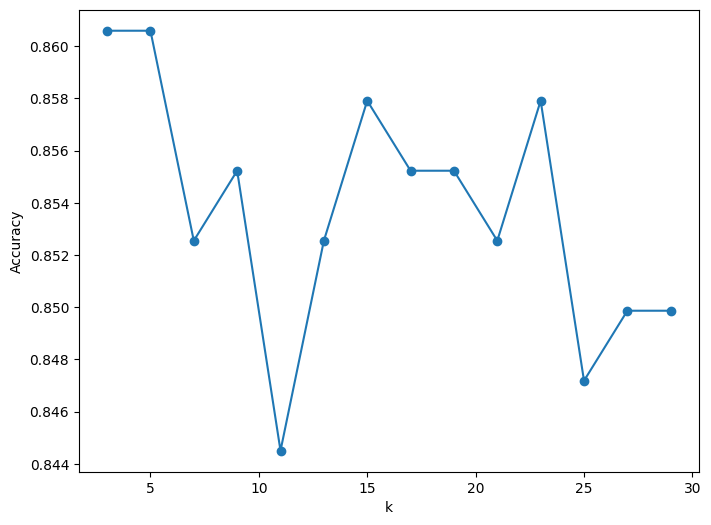

In [ ]:
k_values_songs = list(range(3, 30, 2))
accuracy_score_songs = evalute_accuracy_knn(x_train_songs, y_train_songs, x_test_songs, y_test_songs, k_values_songs)

print('Accuracy list: ', accuracy_score_songs.values())

plt.figure(figsize=(8, 6))
plt.plot(k_values_songs, accuracy_score_songs.values(), marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')

best_k_songs = max(accuracy_score_songs, key=accuracy_score_songs.get)
print('Best K: ', best_k_songs)

*2.6. Compare the performance of the above model based on metrics accuracy, precision, recall, f1 measures) using PrettyTable.*

In [ ]:
knn_model_songs = KNeighborsClassifier(n_neighbors=best_k_songs)
knn_model_songs.fit(x_train_songs, y_train_songs)
knn_y_pred_songs = knn_model_songs.predict(x_test_songs)

results_songs = [
    evaluate_model('Decision Tree', y_test_songs, dt_y_pred_songs),
    evaluate_model('Logistic Regression', y_test_songs, lr_y_pred_songs),
    evaluate_model('kNN', y_test_songs, knn_y_pred_songs)
]

table = PrettyTable()
table.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
for result in results_songs:
    table.add_row(result)

print(table)

+---------------------+--------------------+--------------------+--------------------+--------------------+
|        Model        |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|    Decision Tree    | 0.7828418230563002 | 0.5944355697550585 | 0.5957303249487207 | 0.5950705641108118 |
| Logistic Regression | 0.8632707774798928 | 0.8260047751691206 | 0.5884432689193566 | 0.6127948869303264 |
|         kNN         | 0.8605898123324397 | 0.7479720807394832 | 0.6419086688977653 | 0.6714769647696477 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


*2.7. Apply feature selection to select the best features for the output. Then, train models with Decision Tree, Logistic Regression, and kNN algorithms.*

In [ ]:
selector_songs = SelectKBest(f_classif, k=10)
selector_songs.fit(x_train_songs, y_train_songs)
x_train_selected_songs = selector_songs.transform(x_train_songs)
x_train_selected_test_songs = selector_songs.transform(x_test_songs)

# Decission tree
dt_model_selected_songs = DecisionTreeClassifier(random_state=42)
dt_model_selected_songs.fit(x_train_selected_songs, y_train_songs)
dt_y_pred_selected_songs = dt_model_selected_songs.predict(x_train_selected_test_songs)
dt_accuracy_songs = accuracy_score(y_test_songs, dt_y_pred_songs)
print(f"Accuracy selected decission tree: {dt_accuracy_songs}")

#
lr_model_selected_songs = LogisticRegression(random_state=42)
lr_model_selected_songs.fit(x_train_selected_songs, y_train_songs)
lr_y_pred_selected_songs = lr_model_selected_songs.predict(x_train_selected_test_songs)
lr_accuracy_songs = accuracy_score(y_test_songs, lr_y_pred_songs)
print(f"Accuracy selected logistic regression: {lr_accuracy_songs}")

# KNN
# k_values = list(range(3, 30, 2))
# accuracy_scores_selected = evalute_accuracy_knn(x_train_selected_songs, y_train_songs, x_train_selected_test_songs, y_test_songs, k_values)
# print('Accuracy scores: ', accuracy_scores_selected.values())
# best_k_selected_songs = max(accuracy_scores_selected, key=accuracy_scores_selected.get)
# print(f'Best k: {best_k_selected_songs}')
knn_model_selected_songs = KNeighborsClassifier(n_neighbors=best_k_songs)
knn_model_selected_songs.fit(x_train_selected_songs, y_train_songs)
y_pred_selected_songs = knn_model_selected_songs.predict(x_train_selected_test_songs)
knn_accuracy_songs = accuracy_score(y_test_songs, y_pred_selected_songs)
print(f"Accuracy selected knn: {knn_accuracy_songs}")

results_selected_songs = [
    evaluate_model('Decision Tree', y_test_songs, dt_y_pred_selected_songs),
    evaluate_model('Logistic Regression', y_test_songs, lr_y_pred_selected_songs),
    evaluate_model('kNN', y_test_songs, y_pred_selected_songs)
]
# print(results_selected_songs)
table = PrettyTable()
table.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
for result in results_selected_songs:
    table.add_row(result)

print(table)

Accuracy selected decission tree: 0.7828418230563002
Accuracy selected logistic regression: 0.8632707774798928
Accuracy selected knn: 0.8230563002680965
+---------------------+--------------------+--------------------+--------------------+--------------------+
|        Model        |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|    Decision Tree    | 0.7828418230563002 | 0.5756949436855978 | 0.5682014466155674 |  0.57135560757608  |
| Logistic Regression | 0.8525469168900804 | 0.9254742547425474 | 0.5338983050847458 | 0.5232285203002627 |
|         kNN         | 0.8230563002680965 | 0.6248349368043765 | 0.5714401381841736 | 0.5830284552845528 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


*2.8. Compare the performance of models with and without feature selection based on metrics: accuracy, precision, recall, and f1 measures using PrettyTable.*

In [ ]:
# no feature selection
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'kNN': KNeighborsClassifier(n_neighbors=best_k_songs)
}
results_without_fs = []
for name, model in models.items():
  model.fit(x_train_songs, y_train_songs)
  y_pred = model.predict(x_test_songs)
  results_without_fs.append(evaluate_model(name + " (No FS)", y_test_songs, y_pred))


# with feature selection
results_with_fs = []
for name, model in models.items():
  model.fit(x_train_selected_songs, y_train_songs)
  y_pred = model.predict(x_train_selected_test_songs)
  results_with_fs.append(evaluate_model(name + " (With FS)", y_test_songs, y_pred))

table = PrettyTable()
table.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
for result in results_without_fs + results_with_fs:
    table.add_row(result)
print(table)

+-------------------------------+--------------------+--------------------+--------------------+--------------------+
|             Model             |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+-------------------------------+--------------------+--------------------+--------------------+--------------------+
|     Decision Tree (No FS)     | 0.7828418230563002 | 0.5944355697550585 | 0.5957303249487207 | 0.5950705641108118 |
|  Logistic Regression (No FS)  | 0.8632707774798928 | 0.8260047751691206 | 0.5884432689193566 | 0.6127948869303264 |
|          kNN (No FS)          | 0.8605898123324397 | 0.7479720807394832 | 0.6419086688977653 | 0.6714769647696477 |
|    Decision Tree (With FS)    | 0.7828418230563002 | 0.5756949436855978 | 0.5682014466155674 |  0.57135560757608  |
| Logistic Regression (With FS) | 0.8525469168900804 | 0.9254742547425474 | 0.5338983050847458 | 0.5232285203002627 |
|         kNN (With FS)         | 0.8230563002680965 | 0

# Task 3

In [ ]:
df_spambase = pd.read_csv('drive/MyDrive/data/lab4/spambase.csv')
df_spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


*3.1. Build a Decision Tree model*

In [ ]:
x_spambase = df_spambase.iloc[:, :-1]
y_spambase = df_spambase.iloc[:, -1]

x_train_spambase, x_test_spambase, y_train_spambase, y_test_spambase = train_test_split(x_spambase, y_spambase, test_size=0.2, random_state=42)

dt_model_spambase = DecisionTreeClassifier(random_state=42)
dt_model_spambase.fit(x_train_spambase, y_train_spambase)

dt_y_pred_spambase = dt_model_spambase.predict(x_test_spambase)
dt_accuracy_spambase = accuracy_score(y_test_spambase, dt_y_pred_spambase)
print(f"Accuracy DecissionTree: {dt_accuracy_spambase}")

Accuracy DecissionTree: 0.9185667752442996


*3.2. Build a Logistic Regression model*

In [ ]:
standard_scaler_spambase = StandardScaler()
x_train_spambase = standard_scaler_spambase.fit_transform(x_train_spambase)
x_test_spambase = standard_scaler_spambase.transform(x_test_spambase)

lr_model_spambase = LogisticRegression(random_state=42)
lr_model_spambase.fit(x_train_spambase, y_train_spambase)

lr_y_pred_spambase = lr_model_spambase.predict(x_test_spambase)
lr_accuracy_spambase = accuracy_score(y_test_spambase, lr_y_pred_spambase)
print(f'Accuracy Logistic Regression: {lr_accuracy_spambase}')

Accuracy Logistic Regression: 0.9196525515743756


*3.3. Build kNN models with k={3, 5, ..., 29}. Then, plot the performance of models with different values of k and select the best value of k.*

list accuracy knn: {3: 0.8914223669923995, 5: 0.8935939196525515, 7: 0.8946796959826275, 9: 0.8892508143322475, 11: 0.8968512486427795, 13: 0.8968512486427795, 15: 0.8968512486427795, 17: 0.8903365906623235, 19: 0.8914223669923995, 21: 0.8892508143322475, 23: 0.8957654723127035, 25: 0.8935939196525515, 27: 0.8914223669923995, 29: 0.8946796959826275}
Best K Spambase: 11


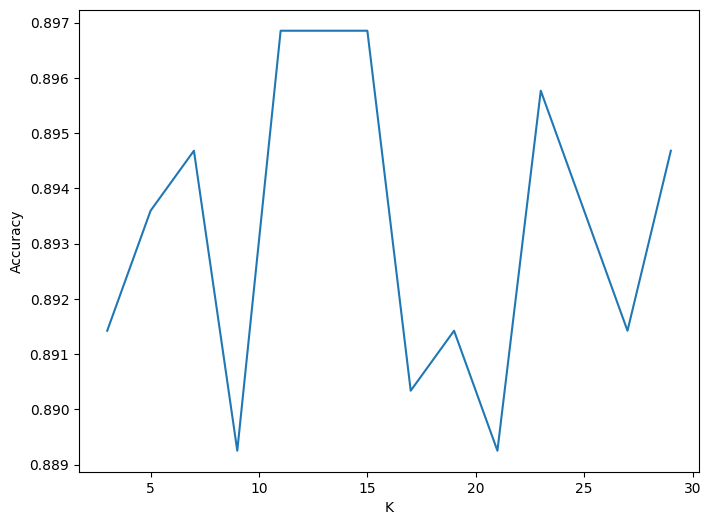

In [ ]:
k_values_spambase = list(range(3, 30, 2))
accuracy_scores_spambase = evalute_accuracy_knn(x_train_spambase, y_train_spambase, x_test_spambase, y_test_spambase, k_values_spambase)
print(f'list accuracy knn: {accuracy_scores_spambase}')

plt.figure(figsize=(8, 6))
plt.plot(k_values_spambase, accuracy_scores_spambase.values())
plt.xlabel('K')
plt.ylabel('Accuracy')

best_k_spambase = max(accuracy_scores_spambase, key=accuracy_scores_spambase.get)
print(f'Best K Spambase: {best_k_spambase}')

*3.4. Compare the performance of the above model based on metrics accuracy, precision, recall, f1 measures) using PrettyTable.*

In [ ]:
knn_model_spambase = KNeighborsClassifier(n_neighbors=best_k)
knn_model_spambase.fit(x_train_spambase, y_train_spambase)
y_pred_knn_spambase = knn_model_spambase.predict(x_test_spambase)
accuracy_knn_spambase = accuracy_score(y_test_spambase, y_pred_knn_spambase)
print(f'Accuracy knn spambase: {accuracy_knn_spambase}')

results_spambase = [
    evaluate_model('Decision Tree', y_test_spambase, dt_y_pred_spambase),
    evaluate_model('Logistic Regression', y_test_spambase, lr_y_pred_spambase),
    evaluate_model('kNN', y_test_spambase, y_pred_knn_spambase)
]

table = PrettyTable()
table.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
for result in results_spambase:
    table.add_row(result)

print(table)

Accuracy knn spambase: 0.8914223669923995
+---------------------+--------------------+--------------------+--------------------+--------------------+
|        Model        |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|    Decision Tree    | 0.9185667752442996 | 0.9187912087912088 | 0.9140591047370707 | 0.9161614506526845 |
| Logistic Regression | 0.9196525515743756 | 0.921702850391375  | 0.9136389975373026 | 0.9169882194744072 |
|         kNN         | 0.8914223669923995 | 0.8902335642667134 | 0.8867738664348834 | 0.8883408985102421 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


*3.5. Apply feature selection to select the best features for the output. Then, train models with Decision Tree, Logistic Regression, and kNN algorithms.*

In [ ]:
selector_spambase = SelectKBest(f_classif, k=10)
selector_spambase.fit(x_train_spambase, y_train_spambase)
x_train_selected_spambase = selector_spambase.transform(x_train_spambase)
x_test_selected_spambase = selector_spambase.transform(x_test_spambase)

# Decission Tree
dt_model_selected_spambase = DecisionTreeClassifier(random_state=42)
dt_model_selected_spambase.fit(x_train_selected_spambase, y_train_spambase)
dt_y_pred_selected_spambase = dt_model_selected_spambase.predict(x_test_selected_spambase)
dt_accuracy_selected_spambase = accuracy_score(y_test_spambase, dt_y_pred_selected_spambase)
print(f'Accuracy selected decission tree: {dt_accuracy_selected_spambase}')

# Logistic Regression
lr_model_selected_spambase = LogisticRegression(random_state=42)
lr_model_selected_spambase.fit(x_train_selected_spambase, y_train_spambase)
lr_y_pred_selected_spambase = lr_model_selected_spambase.predict(x_test_selected_spambase)
lr_accuracy_selected_spambase = accuracy_score(y_test_spambase, lr_y_pred_selected_spambase)
print(f'Accuracy selected logistic regression: {lr_accuracy_selected_spambase}')

# kNN
# accuracy_scores_selected_spambase = evalute_accuracy_knn(x_train_selected_spambase, y_train_spambase, x_test_selected_spambase, y_test_spambase, k_values_spambase)
# best_k_selected_spambase = max(accuracy_scores_selected_spambase, key=accuracy_scores_selected_spambase.get)
knn_model_selected_spambase = KNeighborsClassifier(n_neighbors=best_k_spambase)
knn_model_selected_spambase.fit(x_train_selected_spambase, y_train_spambase)
y_pred_selected_spambase = knn_model_selected_spambase.predict(x_test_selected_spambase)
knn_accuracy_selected_spambase = accuracy_score(y_test_spambase, y_pred_selected_spambase)
print(f'Accuracy selected knn: {knn_accuracy_selected_spambase}')

# evaluate
result_selected_spambase = [
    evaluate_model('Decision Tree', y_test_spambase, dt_y_pred_selected_spambase),
    evaluate_model('Logistic Regression', y_test_spambase, lr_y_pred_selected_spambase),
    evaluate_model('kNN', y_test_spambase, y_pred_selected_spambase)
]

table = PrettyTable()
table.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
for result in result_selected_spambase:
    table.add_row(result)

print(table)

Accuracy selected decission tree: 0.8892508143322475
Accuracy selected logistic regression: 0.8686210640608035
Accuracy selected knn: 0.8827361563517915
+---------------------+--------------------+--------------------+--------------------+--------------------+
|        Model        |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|    Decision Tree    | 0.8892508143322475 | 0.8867865225044003 | 0.8862523540489642 | 0.8865149699441406 |
| Logistic Regression | 0.8686210640608035 | 0.8782164149136626 | 0.854744314066348  | 0.8618428637842863 |
|         kNN         | 0.8827361563517915 | 0.8899692470084343 | 0.8710705490366507 | 0.8773502081401543 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


*3.6. Compare the performance of models with and without feature selection based on metrics: accuracy, precision, recall, and f1 measures using PrettyTable*

In [ ]:
# no feature selection
models_spambase = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'kNN': KNeighborsClassifier(n_neighbors=best_k_spambase)
}
results_without_fs = []
for name, model in models_spambase.items():
  model.fit(x_train_spambase, y_train_spambase)
  y_pred = model.predict(x_test_spambase)
  results_without_fs.append(evaluate_model(name + " (No FS)", y_test_spambase, y_pred))


# with feature selection
results_with_fs = []
for name, model in models_spambase.items():
  model.fit(x_train_selected_spambase, y_train_spambase)
  y_pred = model.predict(x_test_selected_spambase)
  results_with_fs.append(evaluate_model(name + " (With FS)", y_test_spambase, y_pred))

table = PrettyTable()
table.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
for result in results_without_fs + results_with_fs:
    table.add_row(result)
print(table)

+-------------------------------+--------------------+--------------------+--------------------+--------------------+
|             Model             |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+-------------------------------+--------------------+--------------------+--------------------+--------------------+
|     Decision Tree (No FS)     | 0.9196525515743756 | 0.9197394105016592 | 0.915341156019122  | 0.917310510836965  |
|  Logistic Regression (No FS)  | 0.9196525515743756 | 0.921702850391375  | 0.9136389975373026 | 0.9169882194744072 |
|          kNN (No FS)          | 0.8968512486427795 | 0.9008249211985796 | 0.8880776473996813 | 0.8928488764409588 |
|    Decision Tree (With FS)    | 0.8892508143322475 | 0.8867865225044003 | 0.8862523540489642 | 0.8865149699441406 |
| Logistic Regression (With FS) | 0.8686210640608035 | 0.8782164149136626 | 0.854744314066348  | 0.8618428637842863 |
|         kNN (With FS)         | 0.8827361563517915 | 0